In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [3]:
# check gpu
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print("x_train_full shape", x_train_full.shape)
print("x_train_full type", x_train_full.dtype)

x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test / 255.0

class_name = ["T-shirt/top", 
              "Trouser",
              "Pullover",
              "Dress", 
              "Coat", 
              "Sandal", 
              "Shirt", 
              "Sneaker",
              "Bag", 
              "Ankle boot"]

4422102/4422102 [==============================] - 0s 0us/step
x_train_full shape (60000, 28, 28)
x_train_full type uint8


# Definizione dei livelli della rete neruale

In [6]:
# Sequential model is composed by a sequential
# single stack of layers connected sequentially
model = keras.models.Sequential()

# layer[0] Flatten layer has role to convert each input 
# data to an 1d array.
# It is more of less the same as numpy.reshape(-1, 28*28) 
model.add(keras.layers.Flatten(input_shape=[28,28])) 

# layer[1] first dense hidden layer with 300 neurons.
# Activation function: ReLu
model.add(keras.layers.Dense(300, activation="relu"))

# layer[2] second dense  hidden layer with 100 neurons
# Activation function: ReLu
model.add(keras.layers.Dense(100, activation="relu"))

# layer[3] last dense hidden layerwith 10 neurons (one per class)
# Activation function: softmax
model.add(keras.layers.Dense(10, activation="softmax"))


# compile model
model.compile(loss="sparse_categorical_crossentropy", # we have sparse labels 
              optimizer="sgd", 
              metrics=["accuracy"])


# Training

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.7228 - accuracy: 0.7631 - val_loss: 0.5256 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4938 - accuracy: 0.8278 - val_loss: 0.4727 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4487 - accuracy: 0.8435 - val_loss: 0.4139 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4207 - accuracy: 0.8520 - val_loss: 0.4057 - val_accuracy: 0.8574
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3995 - accuracy: 0.8608 - val_loss: 0.3807 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3834 - accuracy: 0.8654 - val_loss: 0.3840 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3700 - accuracy: 0.8697 - val_loss: 0.3832 - val_accuracy:

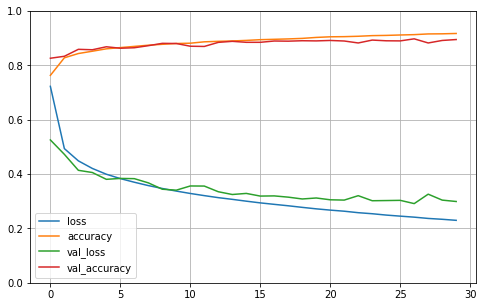

In [7]:

# training model 
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid,  y_valid))


# plot training history
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
